# Drive for Show and Putt for Dough!
 - Which part of the game of golf really has influence over a scoring average?
 - Simple linear regression to find which has a larger coefficient when squared.

### Importing any relevant libraries.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

In [2]:
ls

Blog_3.ipynb
Statistics are an important part of all sports.docx
Untitled.ipynb
Untitled1.ipynb
Untitled2.ipynb
data/


In [3]:
putt = pd.read_csv('data/AvgStrkGainPutt21.csv', encoding='latin1')
tee = pd.read_csv('data/AvgStrkGainTee21.csv', encoding='latin1')
score = pd.read_csv('data/ScoringAvg21.csv', encoding='latin1')
dd = pd.read_csv('data/AvgDistance21.csv', encoding='latin1')
pph = pd.read_csv('data/PercOnePutts21.csv', encoding='latin1')

## Exploring the Data
 - Making sure there aren't any empty rows or columns.
 - Checking to make sure that outliers won't harm the data.

### 2021 Putting Statistics
 - Strokes gained from putting:
  1. Total
  2. Average

In [4]:
putt.head()

,Name,Avg_SG_Putt,Total_SG_Putt
0,Louis Oosthuizen,0.764,45.852
1,J.T. Poston,0.706,55.768
2,Ian Poulter,0.695,38.241
3,Patrick Reed,0.669,44.154
4,Zach Johnson,0.667,50.655


In [5]:
putt.sort_values(by=['Total_SG_Putt'],ascending=False).head()

,Name,Avg_SG_Putt,Total_SG_Putt
1,J.T. Poston,0.706,55.768
4,Zach Johnson,0.667,50.655
5,Jason Kokrak,0.628,47.696
0,Louis Oosthuizen,0.764,45.852
3,Patrick Reed,0.669,44.154


In [6]:
putt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           196 non-null    object 
 1   Avg_SG_Putt    196 non-null    float64
 2   Total_SG_Putt  196 non-null    float64
dtypes: float64(2), object(1)
memory usage: 4.7+ KB


In [7]:
putt.isnull().sum()

Name             0
Avg_SG_Putt      0
Total_SG_Putt    0
dtype: int64

In [8]:
putt.describe()

,Avg_SG_Putt,Total_SG_Putt
count,196.000000,196.000000
mean,0.027469,2.861658
std,0.352788,22.470854
min,-1.261000,-60.672000
25%,-0.193500,-11.483500
50%,0.055000,3.742500
75%,0.292250,19.509000
max,0.764000,55.768000


In [9]:
putt.shape

(196, 3)

### Tee Statistics
 - Strokes gained from the golfers tee shot:
  1. Average
  2. Total

In [10]:
tee.head()

,Name,Avg_SG_Tee,Total_SG_Tee
0,Bryson DeChambeau,1.162,78.987
1,Jon Rahm,0.834,53.366
2,Sergio Garcia,0.796,54.102
3,Rory McIlroy,0.660,41.575
4,Viktor Hovland,0.656,45.929


In [11]:
tee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          196 non-null    object 
 1   Avg_SG_Tee    196 non-null    float64
 2   Total_SG_Tee  196 non-null    float64
dtypes: float64(2), object(1)
memory usage: 4.7+ KB


In [12]:
tee.isnull().sum()

Name            0
Avg_SG_Tee      0
Total_SG_Tee    0
dtype: int64

In [13]:
tee.describe()

,Avg_SG_Tee,Total_SG_Tee
count,196.000000,196.000000
mean,0.030071,3.432179
std,0.340138,20.976374
min,-1.247000,-67.323000
25%,-0.139750,-8.348250
50%,0.040500,2.263000
75%,0.240500,15.736750
max,1.162000,78.987000


In [14]:
tee.shape

(196, 3)

## Scoring Average
 - Average score per round.

In [15]:
score.head()

,Name,Scoring_Avg
0,Jon Rahm,69.30
1,Dustin Johnson,69.62
2,Louis Oosthuizen,69.71
3,Bryson DeChambeau,69.73
4,Patrick Cantlay,69.74


In [16]:
score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         196 non-null    object 
 1   Scoring_Avg  196 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.2+ KB


In [17]:
score.isnull().sum()

Name           0
Scoring_Avg    0
dtype: int64

In [18]:
score.shape

(196, 2)

In [19]:
score.describe()

,Scoring_Avg
count,196.000000
mean,71.075816
std,0.727508
min,69.300000
25%,70.577500
50%,71.075000
75%,71.562500
max,73.200000


## Driving Distance
 - Average drive.

In [20]:
dd.head()

,Name,Avg_Dist
0,Bryson DeChambeau,323.7
1,Rory McIlroy,319.3
2,Cameron Champ,317.1
3,Matthew Wolff,315.9
4,Will Gordon,315.0


In [21]:
dd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      196 non-null    object 
 1   Avg_Dist  196 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.2+ KB


In [22]:
dd.isnull().sum()

Name        0
Avg_Dist    0
dtype: int64

In [23]:
dd.shape

(196, 2)

In [24]:
dd.describe()

,Avg_Dist
count,196.000000
mean,297.005102
std,8.590387
min,269.200000
25%,291.700000
50%,296.850000
75%,302.825000
max,323.700000


## Putts Per Hole
 - Percentage of one putts per hole.

In [25]:
pph.head()

,Name,Perc_1_Putts
0,Lucas Herbert,52.78
1,Joohyung Kim,51.39
2,Grant Hirschman,50.00
3,Joshua Creel,50.00
4,Tyrrell Hatton,50.00


In [26]:
pph.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          271 non-null    object 
 1   Perc_1_Putts  271 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.4+ KB


In [27]:
pph.isnull().sum()

Name            0
Perc_1_Putts    0
dtype: int64

In [28]:
pph.shape

(271, 2)

In [29]:
pph.describe()

,Perc_1_Putts
count,271.000000
mean,40.217048
std,4.766319
min,22.220000
25%,37.040000
50%,40.280000
75%,43.195000
max,52.780000


### Merging Dataframes
 - Combing the data frames under the column, Name.
 - This makes it easier to work with the data.
 - Clean up and missing values.
 - Housekeeping stuff.

In [30]:
df = putt.merge(tee,on='Name').merge(score,on='Name').merge(dd,on='Name').merge(pph,on='Name')

#### Checking out the new dataframe.

In [31]:
df.head()

,Name,Avg_SG_Putt,Total_SG_Putt,Avg_SG_Tee,Total_SG_Tee,Scoring_Avg,Avg_Dist,Perc_1_Putts
0,Louis Oosthuizen,0.764,45.852,0.023,1.368,69.71,297.8,37.50
1,J.T. Poston,0.706,55.768,-0.131,-10.311,71.22,299.9,37.96
2,Ian Poulter,0.695,38.241,-0.079,-4.350,70.22,285.2,35.19
3,Patrick Reed,0.669,44.154,-0.003,-0.182,70.04,291.4,43.33
4,Zach Johnson,0.667,50.655,-0.215,-16.322,70.40,289.0,38.89


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           164 non-null    object 
 1   Avg_SG_Putt    164 non-null    float64
 2   Total_SG_Putt  164 non-null    float64
 3   Avg_SG_Tee     164 non-null    float64
 4   Total_SG_Tee   164 non-null    float64
 5   Scoring_Avg    164 non-null    float64
 6   Avg_Dist       164 non-null    float64
 7   Perc_1_Putts   164 non-null    float64
dtypes: float64(7), object(1)
memory usage: 11.5+ KB


In [33]:
df.isnull().sum()

Name             0
Avg_SG_Putt      0
Total_SG_Putt    0
Avg_SG_Tee       0
Total_SG_Tee     0
Scoring_Avg      0
Avg_Dist         0
Perc_1_Putts     0
dtype: int64

In [34]:
df.describe()

,Avg_SG_Putt,Total_SG_Putt,Avg_SG_Tee,Total_SG_Tee,Scoring_Avg,Avg_Dist,Perc_1_Putts
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,0.050604,3.995293,0.035768,3.434585,70.965061,296.885976,40.536280
std,0.334316,22.854682,0.306198,19.811081,0.628843,8.068198,4.078242
min,-0.867000,-60.672000,-1.247000,-67.323000,69.620000,274.700000,27.780000
25%,-0.159500,-9.263000,-0.131750,-7.299000,70.517500,291.850000,37.500000
50%,0.068500,5.034500,0.055500,3.731000,71.020000,297.100000,40.650000
75%,0.292250,20.147000,0.226750,15.274250,71.300000,301.900000,43.127500
max,0.764000,55.768000,0.796000,59.481000,73.130000,319.300000,50.000000


In [35]:
df.shape

(164, 8)

In [36]:
X = df.drop(columns='Scoring_Avg')
y = df['Scoring_Avg']

In [37]:
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 42)

In [38]:
print('X_train:')
display(X_train.describe())
print('X_test:')
display(X_test.describe())

X_train:


,Avg_SG_Putt,Total_SG_Putt,Avg_SG_Tee,Total_SG_Tee,Avg_Dist,Perc_1_Putts
count,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000
mean,0.052885,4.336595,0.024824,2.866954,296.500763,40.805878
std,0.332215,22.968670,0.308542,20.163428,7.926251,4.020560
min,-0.867000,-60.672000,-1.247000,-67.323000,274.700000,32.410000
25%,-0.139000,-8.298500,-0.132500,-7.783500,291.150000,38.030000
50%,0.068000,4.251000,0.059000,4.021000,297.200000,41.200000
75%,0.282000,20.188000,0.209500,15.060500,300.800000,43.330000
max,0.764000,55.768000,0.656000,59.481000,315.900000,50.000000


X_test:


,Avg_SG_Putt,Total_SG_Putt,Avg_SG_Tee,Total_SG_Tee,Avg_Dist,Perc_1_Putts
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,0.041545,2.640424,0.079212,5.687909,298.415152,39.466061
std,0.347627,22.695155,0.297316,18.465342,8.563554,4.191764
min,-0.681000,-42.777000,-0.517000,-29.973000,286.200000,27.780000
25%,-0.260000,-14.274000,-0.120000,-5.931000,292.300000,37.040000
50%,0.099000,5.268000,0.029000,1.726000,294.500000,38.890000
75%,0.372000,19.464000,0.246000,16.209000,306.000000,42.360000
max,0.552000,37.244000,0.796000,54.102000,319.300000,48.610000


## Baseline Score to Compare
 - This is our average score that is our target.

In [39]:
train_target_mean = y_train.mean()
train_target_mean

70.97190839694656

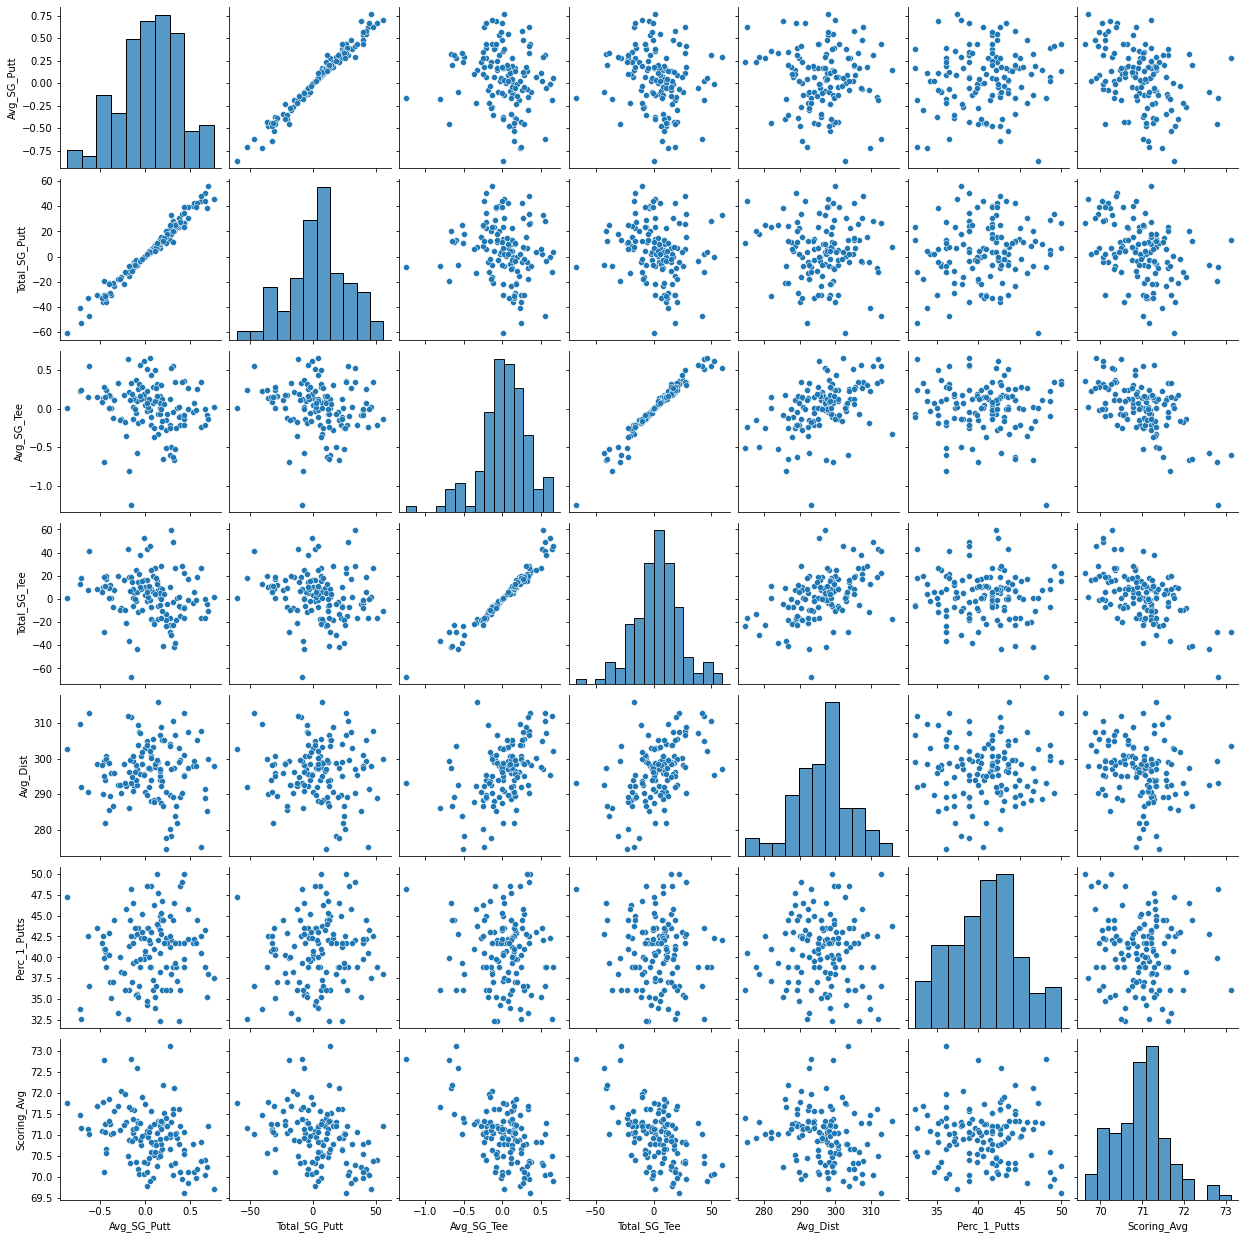

In [40]:
# Create train dataframe by merging X and y train sets
train_df = pd.concat([X_train, y_train], axis = 1)

# Visualize the overview of the dataframe 
# Use pairplot from seaborn
sns.pairplot(train_df)

<AxesSubplot:>

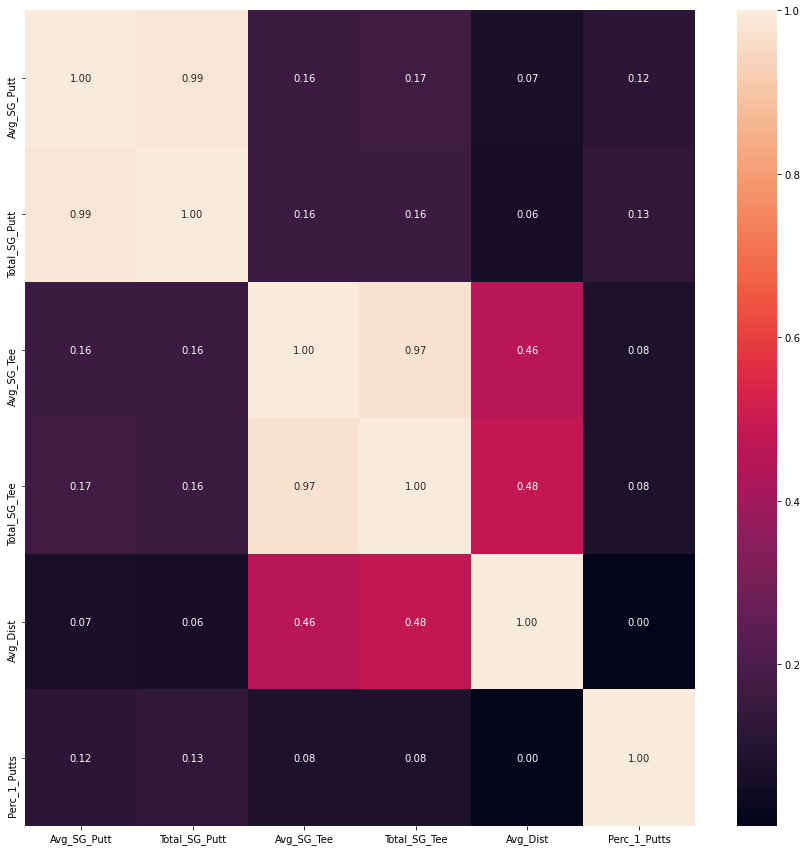

In [41]:
plt.figure(figsize = (15,15))
sns.heatmap(X_train.corr().abs(), annot = True, fmt='.2f')

<AxesSubplot:>

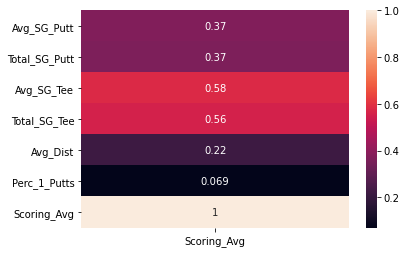

In [42]:
sns.heatmap(train_df.corr()[['Scoring_Avg']].abs(),annot=True)

In [43]:
train_df2 = train_df.copy()

In [44]:
train_df2.describe()

,Avg_SG_Putt,Total_SG_Putt,Avg_SG_Tee,Total_SG_Tee,Avg_Dist,Perc_1_Putts,Scoring_Avg
count,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000
mean,0.052885,4.336595,0.024824,2.866954,296.500763,40.805878,70.971908
std,0.332215,22.968670,0.308542,20.163428,7.926251,4.020560,0.653202
min,-0.867000,-60.672000,-1.247000,-67.323000,274.700000,32.410000,69.620000
25%,-0.139000,-8.298500,-0.132500,-7.783500,291.150000,38.030000,70.510000
50%,0.068000,4.251000,0.059000,4.021000,297.200000,41.200000,71.020000
75%,0.282000,20.188000,0.209500,15.060500,300.800000,43.330000,71.310000
max,0.764000,55.768000,0.656000,59.481000,315.900000,50.000000,73.130000


In [45]:
train_df2.columns

Index(['Name', 'Avg_SG_Putt', 'Total_SG_Putt', 'Avg_SG_Tee', 'Total_SG_Tee',
       'Avg_Dist', 'Perc_1_Putts', 'Scoring_Avg'],
      dtype='object')

In [46]:
train_df2 = train_df2.drop(columns=['Total_SG_Putt', 'Total_SG_Tee'])
train_df2.head()

,Name,Avg_SG_Putt,Avg_SG_Tee,Avg_Dist,Perc_1_Putts,Scoring_Avg
84,Michael Thompson,0.062,-0.104,288.1,43.06,71.22
2,Ian Poulter,0.695,-0.079,285.2,35.19,70.22
94,Scottie Scheffler,0.023,0.515,305.0,43.52,70.33
45,Matt Jones,0.273,0.124,304.0,41.20,70.67
42,Troy Merritt,0.282,-0.207,289.9,45.00,70.94


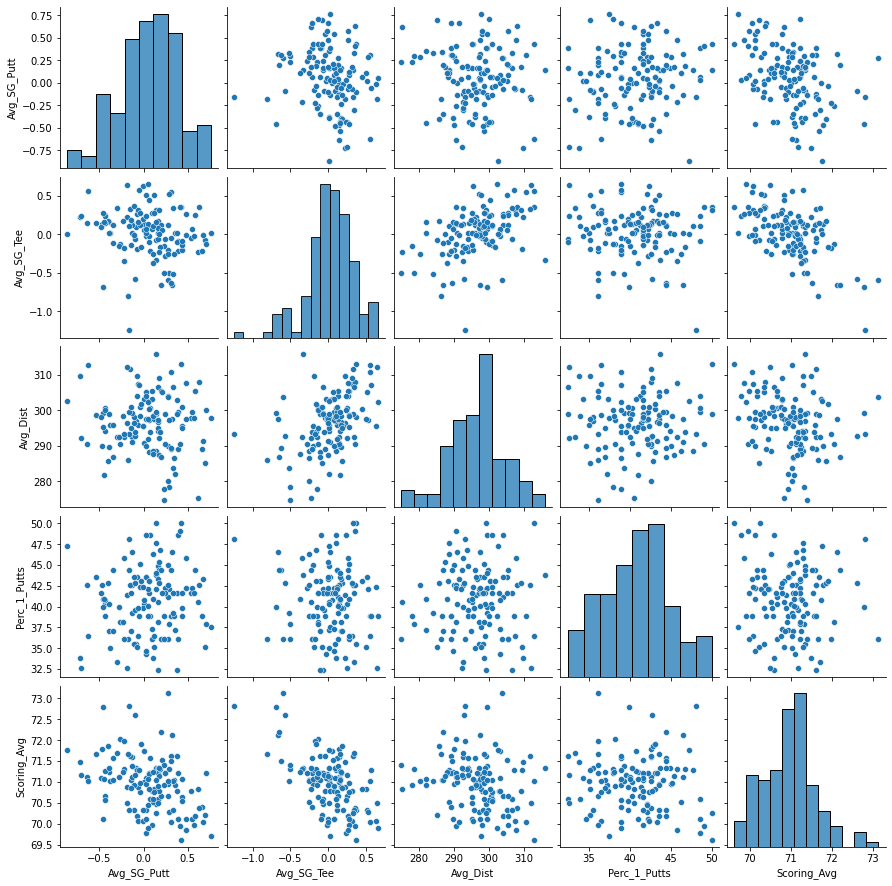

In [47]:
sns.pairplot(train_df2)

In [48]:
X_train = train_df2.drop(columns=['Name', 'Scoring_Avg', 'Avg_Dist', 'Perc_1_Putts'])
y_train = train_df2['Scoring_Avg']

In [49]:
X_train.head()

,Avg_SG_Putt,Avg_SG_Tee
84,0.062,-0.104
2,0.695,-0.079
94,0.023,0.515
45,0.273,0.124
42,0.282,-0.207


In [63]:
def fit_n_run(xtr, ytr):
    '''
    This function runs fits and runs the model for the variable input with the X_train, y_train and returns model summary 
    Input:
    xtr: X_training set
    y_tr: y_training set
    
    Output:
    Model Summary
    '''
    model = sm.OLS(ytr, sm.add_constant(xtr)).fit()
    print(model.summary())

## Modeling

### <u>MLR Model</u>
 - Figure out which variable has the most influence over scoring average.
  1. Check the R-Squared score to see if the variables help explain the model at all.
  2. The highest coefficient squared is the most impactful variable.

In [64]:
fit_n_run(X_train, y_train)

                            OLS Regression Results                            
Dep. Variable:            Scoring_Avg   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     81.44
Date:                Sat, 27 Nov 2021   Prob (F-statistic):           1.53e-23
Time:                        10:35:36   Log-Likelihood:                -75.822
No. Observations:                 131   AIC:                             157.6
Df Residuals:                     128   BIC:                             166.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          71.0563      0.039   1828.711      

In [73]:
print(X_train.info)
print(y_train)

<bound method DataFrame.info of      Avg_SG_Putt  Avg_SG_Tee
84         0.062      -0.104
2          0.695      -0.079
94         0.023       0.515
45         0.273       0.124
42         0.282      -0.207
..           ...         ...
71         0.137       0.159
106       -0.057       0.570
14         0.480       0.266
92         0.025       0.071
102       -0.032      -0.161

[131 rows x 2 columns]>
84     71.22
2      70.22
94     70.33
45     70.67
42     70.94
       ...  
71     71.05
106    71.29
14     69.86
92     70.12
102    71.90
Name: Scoring_Avg, Length: 131, dtype: float64


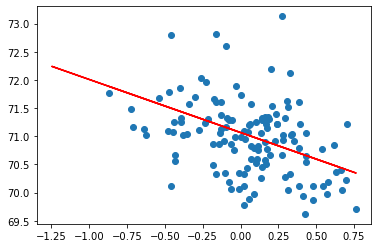

In [76]:
plt.scatter(X_train['Avg_SG_Putt'], y_train)
plt.plot(X_train, 71.0653 + (-0.9424*X_train), 'r')
plt.show()